In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#数据清洗

In [5]:
df_titanic = pd.read_csv('titanic.csv', index_col=0)

In [6]:
print('前5个数据组\n',df_titanic.head(5))
print('后5个数据\n',df_titanic.tail(5))

前5个数据组
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
后5个数据
      survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0 

In [7]:
print('特征相关性')

特征相关性


In [8]:
new_df = df_titanic.corr()
print('矩阵特征相关度\n',new_df)

矩阵特征相关度
             survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


绘制特征相关性热力图



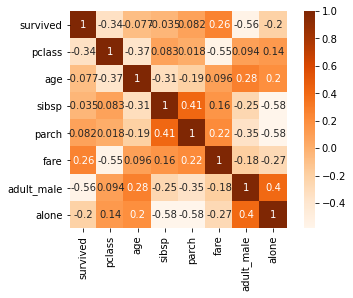

In [9]:
print('绘制特征相关性热力图\n')
import seaborn as sns
plt.figure(1)
sns.heatmap(new_df, annot=True, vmax=1, square=True, cmap='Oranges')
plt.show()

In [10]:
print('特征重要性')

特征重要性


In [11]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [12]:
print('剔除一部分特征\n')
df_mod = df_titanic.drop(['sibsp'], axis=1)
print(df_mod)

剔除一部分特征

     survived  pclass     sex   age  parch     fare embarked   class    who  \
0           0       3    male  22.0      0   7.2500        S   Third    man   
1           1       1  female  38.0      0  71.2833        C   First  woman   
2           1       3  female  26.0      0   7.9250        S   Third  woman   
3           1       1  female  35.0      0  53.1000        S   First  woman   
4           0       3    male  35.0      0   8.0500        S   Third    man   
..        ...     ...     ...   ...    ...      ...      ...     ...    ...   
886         0       2    male  27.0      0  13.0000        S  Second    man   
887         1       1  female  19.0      0  30.0000        S   First  woman   
888         0       3  female   NaN      2  23.4500        S   Third  woman   
889         1       1    male  26.0      0  30.0000        C   First    man   
890         0       3    male  32.0      0   7.7500        Q   Third    man   

     adult_male deck  embark_town alive  a

In [13]:
df_mod.dtypes

survived         int64
pclass           int64
sex             object
age            float64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [14]:
# print('数据特征缺失值补充和非整形浮点型的处理\n')
# df_mod['sex']=(df_mod['sex']=='male').astype('float')
# df_mod['age']=df_mod['age'].fillna(df_mod['age'].mean())
# labels=df_mod['embarked'].unique().tolist()
# df_mod['embarked']=df_mod['embarked'].apply(lambda x:labels.index(x))
# df_mod.fillna(0)

In [15]:
print('尝试pd.factorize作为object转换int\n')
df_mod['sex'] = pd.factorize(df_mod['sex'])[0].astype(np.int64)
df_mod['class'] = pd.factorize(df_mod['class'])[0].astype(np.int64)

尝试pd.factorize作为object转换int



In [16]:
df_mod.dtypes

survived         int64
pclass           int64
sex              int64
age            float64
parch            int64
fare           float64
embarked        object
class            int64
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [17]:
df_mod.head(3)

,survived,pclass,sex,age,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,0,7.2500,S,0,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,0,71.2833,C,1,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,7.9250,S,0,woman,False,NaN,Southampton,yes,True


In [18]:
print('删去不需要的特征\n')
df_mod1 = df_mod[['survived', 'pclass', 'sex', 'age', 'parch', 'fare', 'class']]

删去不需要的特征



In [19]:
print(df_mod1.head(5))
print(df_mod1.dtypes)
df_mod1['age']=df_mod1['age'].fillna(df_mod1['age'].mean())
print('判断是否有NAN值\n',df_mod1.isnull().any())


   survived  pclass  sex   age  parch     fare  class
0         0       3    0  22.0      0   7.2500      0
1         1       1    1  38.0      0  71.2833      1
2         1       3    1  26.0      0   7.9250      0
3         1       1    1  35.0      0  53.1000      1
4         0       3    0  35.0      0   8.0500      0
survived      int64
pclass        int64
sex           int64
age         float64
parch         int64
fare        float64
class         int64
dtype: object
判断是否有NAN值
 survived    False
pclass      False
sex         False
age         False
parch       False
fare        False
class       False
dtype: bool


d:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
print(df_mod1)

     survived  pclass  sex        age  parch     fare  class
0           0       3    0  22.000000      0   7.2500      0
1           1       1    1  38.000000      0  71.2833      1
2           1       3    1  26.000000      0   7.9250      0
3           1       1    1  35.000000      0  53.1000      1
4           0       3    0  35.000000      0   8.0500      0
..        ...     ...  ...        ...    ...      ...    ...
886         0       2    0  27.000000      0  13.0000      2
887         1       1    1  19.000000      0  30.0000      1
888         0       3    1  29.699118      2  23.4500      0
889         1       1    0  26.000000      0  30.0000      1
890         0       3    0  32.000000      0   7.7500      0

[891 rows x 7 columns]


In [21]:
print('训练数据以及测试数据\n')
x = df_mod1.iloc[:, df_mod1.columns != 'survived']
y = df_mod1.iloc[:, df_mod1.columns == 'survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

训练数据以及测试数据



In [22]:
print(y_test.head(3))
print(x_train.head(3))

     survived
356         1
183         1
288         1
     pclass  sex        age  parch      fare  class
31        1    1  29.699118      0  146.5208      1
842       1    1  30.000000      0   31.0000      1
881       3    0  33.000000      0    7.8958      0


In [23]:
#classify tree modoul

In [24]:
clf = DecisionTreeClassifier(random_state=15)
clf = clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print('评分\n', score)

评分
 0.7611940298507462


In [25]:
importance = clf.feature_importances_

In [26]:
print('特征重要性\n', importance)

特征重要性
 [0.05852649 0.28096655 0.2814301  0.03016208 0.26760135 0.08131343]


In [27]:
print('数据的特征名称\n')
lables = list(x_train.columns)
print(lables)

数据的特征名称

['pclass', 'sex', 'age', 'parch', 'fare', 'class']


In [28]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.05853
Feature: 1, Score: 0.28097
Feature: 2, Score: 0.28143
Feature: 3, Score: 0.03016
Feature: 4, Score: 0.26760
Feature: 5, Score: 0.08131


将特征重要性可视化



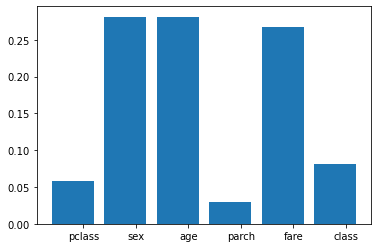

In [29]:
print('将特征重要性可视化\n')
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([index + 0.2 for index in range(len(lables))], lables) #添加特征标签
plt.show()

In [30]:
#设计特征置信区间
print('修改数据的特征置信空间\n')

修改数据的特征置信空间



In [31]:
def confidenceinterval(data):
    data_fe = data['age']
    standed_deviation = 0
    lenth = len(data_fe)
    print('lenth of array\n', lenth)
    data_num = np.array(data_fe)
    print('数字化数据\n', data_num)
    sum_data = sum(data_fe)
    avg_num = sum_data/lenth
    print('avg_num\n', avg_num)
    #calculate the standard deviation
    for i in data_fe:
        standed_deviation += (i - avg_num)**2
    standed_deviation = standed_deviation/lenth
    stanard_val = standed_deviation**0.5
    print('标准差\n', stanard_val)
    # 99%confidential interval
    lower_bound = avg_num - 1.98*stanard_val
    higher_bound = avg_num + 1.98*stanard_val
    return lower_bound, higher_bound

print(confidenceinterval(df_mod1))

lenth of array
 891
数字化数据
 [22.         38.         26.         35.         35.         29.69911765
 54.          2.         27.         14.          4.         58.
 20.         39.         14.         55.          2.         29.69911765
 31.         29.69911765 35.         34.         15.         28.
  8.         38.         29.69911765 19.         29.69911765 29.69911765
 40.         29.69911765 29.69911765 66.         28.         42.
 29.69911765 21.         18.         14.         40.         27.
 29.69911765  3.         19.         29.69911765 29.69911765 29.69911765
 29.69911765 18.          7.         21.         49.         29.
 65.         29.69911765 21.         28.5         5.         11.
 22.         38.         45.          4.         29.69911765 29.69911765
 29.         19.         17.         26.         32.         16.
 21.         26.         32.         25.         29.69911765 29.69911765
  0.83       30.         22.         29.         29.69911765 28.
 17.         33

In [32]:
df_mod2 = df_mod1[(3.97 < df_mod1['age']) & (df_mod1['age'] < 55.428)]

In [33]:
print(len(df_mod2))

821


In [34]:
#将对年纪进行置信区间筛选之后的数据同样进行训练

In [35]:
x = df_mod2.iloc[:, df_mod2.columns != 'survived']
y = df_mod2.iloc[:, df_mod2.columns == 'survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
clf = DecisionTreeClassifier(random_state=15)
clf = clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print('评分\n', score)

评分
 0.7935222672064778


In [36]:
print('明显可见评分准确提升')

明显可见评分准确提升


Feature: 0, Score: 0.11835
Feature: 1, Score: 0.31226
Feature: 2, Score: 0.27186
Feature: 3, Score: 0.03002
Feature: 4, Score: 0.26751
Feature: 5, Score: 0.00000
将特征重要性可视化



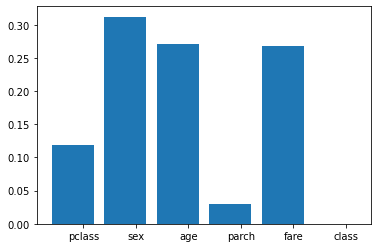

In [37]:
importance = clf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
print('将特征重要性可视化\n')
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([index + 0.2 for index in range(len(lables))], lables) #添加特征标签
plt.show()

In [38]:
#GBDT等提升树的实验
print('Gradient Boosting Tree Attemption\n')

Gradient Boosting Tree Attemption



In [40]:
from sklearn.ensemble import GradientBoostingClassifier
import joblib
print('import GBDT algorithm\n')

import GBDT algorithm



In [41]:
gbr = GradientBoostingClassifier(n_estimators=3000, max_depth=2, min_samples_split=2, learning_rate=0.1)
gbr.fit(x_train, y_train)
joblib.dump(gbr, 'train_model_result.m') 

d:\python\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


['train_model_result.m']

In [42]:
y_t_g = gbr.predict(x_train)
y_t_g1 = gbr.predict(x_test)

acc_train = gbr.score(x_train, y_train)
acc_test = gbr.score(x_test, y_test)

print(acc_train, acc_test)

0.9703832752613241 0.8097165991902834
